In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import sklearn.svm
import cv2
from matplotlib import pyplot as plt
import numpy as np
from os.path import exists
import pandas as pd
import PIL
import torch
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import albumentations
import matplotlib.pyplot as plt 
import tensorflow as tf 
import cv2 as cv 
from PIL import Image
import seaborn as sns
import plotly.express as px
import string
import re
from sklearn.metrics.pairwise import cosine_similarity
from skimage.io import imread
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline
torch.cuda.empty_cache()
#cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
#accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#print("Accelerator type = ",accelerator)
#print("Pytorch verision: ", torch.__version__)

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install cityscapesscripts

     |████████████████████████████████| 481kB 8.6MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 92kB 6.7MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=50f0655765fbb7d19f198bb399f758ce94781095004629d71743b3671c4f092c
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing


In [ ]:
from cityscapesscripts import download

In [ ]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=fhemanth&password=Hb17863@&submit=Login' https://www.cityscapes-dataset.com/login/


--2021-04-28 01:59:05--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2021-04-28 01:59:07--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  43.80K   283KB/s    in 0.2s    

2021-04-28 01:59:07 (283 KB/s) - ‘index.html’ saved [44855]



In [ ]:
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3


--2021-04-28 02:30:02--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/octet-stream]
Saving to: ‘leftImg8bit_trainvaltest.zip’

leftImg8bit_trainva 100%[===================>]  10.80G  18.9MB/s    in 9m 50s  

2021-04-28 02:39:53 (18.7 MB/s) - ‘leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



In [ ]:
!ls

cookies.txt			 gtFine_trainvaltest.zip       sample_data
drive				 index.html
gtBbox_cityPersons_trainval.zip  leftImg8bit_trainvaltest.zip


In [ ]:
import shutil
shutil.unpack_archive("leftImg8bit_trainvaltest.zip", "/content/drive/My Drive/leftImg8bit_trainvaltest")

In [ ]:
train_path = '/content/drive/MyDrive/leftImg8bit_trainvaltest/leftImg8bit/train/'
test_path = '/content/drive/MyDrive/leftImg8bit_trainvaltest/leftImg8bit/val/'
train_label = '/content/drive/MyDrive/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/'
test_label = '/content/drive/MyDrive/gtBbox_cityPersons_trainval/gtBboxCityPersons/val/'

In [ ]:
import ast
import json

def get_car_labels_coordinates(input_file_path):
  with open(input_file_path) as f:
    label_file = json.load(f)
  #print(label_file.keys())
  #print(label_file['objects'][0].items())
  for j in range(len(label_file['objects'])):
    label = label_file['objects'][j]['label']

    if label == 'pedestrian':
      height = label_file['imgHeight']
      width = label_file['imgWidth']
      bbox = label_file['objects'][j]['bbox']
      file_id.append(input_file_path.split('/val/')[1].split('.')[0])
      width_all.append(width)
      height_all.append(height)
      x_all.append(int(bbox[0]))
      y_all.append(int(bbox[1]))
      w_all.append(int(bbox[2]))
      h_all.append(int(bbox[3]))
      label_all.append(label)
    else:
      continue




    #print(ok)
  #print(label_file)


In [ ]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in sorted(os.walk(dir)):
        for name in sorted(files):
            r.append(os.path.join(root, name))
    return r

In [ ]:
files = list_files('/content/drive/My Drive/leftImg8bit_trainvaltest/leftImg8bit/train/')

In [ ]:
print(files[0])
os.path.exists(f'{files[0]}')
print(files[0].split('/train/')[1].split('_leftImg8bit.png')[0])
label = train_label+ files[0].split('/train/')[1].split('_leftImg8bit.png')[0] + '_gtBboxCityPersons.json'
print(label)
print(os.path.exists(f'{label}'))
#print('/content/drive/MyDrive/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/jena/jena_000078_000019_gtBboxCityPersons.json')

/content/drive/My Drive/leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png
aachen/aachen_000000_000019
/content/drive/MyDrive/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/aachen/aachen_000000_000019_gtBboxCityPersons.json
True


In [ ]:
input_df = pd.DataFrame(columns = ['file_id', 'width', 'height', 'x', 'y', 'w', 'h', 'label'])

In [ ]:
for j in range(2):
  label = train_label+ files[j].split('/val/')[1].split('_leftImg8bit.png')[0] + '_gtBboxCityPersons.json'
  print(label)

/content/drive/MyDrive/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/frankfurt/frankfurt_000000_000294_gtBboxCityPersons.json
/content/drive/MyDrive/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/frankfurt/frankfurt_000000_000576_gtBboxCityPersons.json


In [ ]:
from tqdm import tqdm, tqdm_notebook
from functools import partial

tqdm = partial(tqdm, position=0, leave=True)

In [ ]:
file_id=[]
width_all=[]
height_all=[]
x_all = []
y_all = []
w_all = []
h_all = []
label_all = []

for j in tqdm(range(len(files))):
  label = test_label+ files[j].split('/val/')[1].split('_leftImg8bit.png')[0] + '_gtBboxCityPersons.json'
  get_car_labels_coordinates(label)

input_df['file_id'] = file_id
input_df['width'] = width_all
input_df['height'] = height_all
input_df['x'] = x_all
input_df['y'] =y_all
input_df['w'] =w_all
input_df['h'] =h_all
input_df['label'] = label_all





100%|██████████| 500/500 [00:01<00:00, 455.73it/s]


In [ ]:
print(input_df)

                                                file_id  width  ...    h       label
0     frankfurt/frankfurt_000000_000294_gtBboxCityPe...   2048  ...   40  pedestrian
1     frankfurt/frankfurt_000000_000294_gtBboxCityPe...   2048  ...   99  pedestrian
2     frankfurt/frankfurt_000000_000294_gtBboxCityPe...   2048  ...   84  pedestrian
3     frankfurt/frankfurt_000000_000294_gtBboxCityPe...   2048  ...   91  pedestrian
4     frankfurt/frankfurt_000000_001016_gtBboxCityPe...   2048  ...  245  pedestrian
...                                                 ...    ...  ...  ...         ...
3152    munster/munster_000169_000019_gtBboxCityPersons   2048  ...   62  pedestrian
3153    munster/munster_000169_000019_gtBboxCityPersons   2048  ...   88  pedestrian
3154    munster/munster_000170_000019_gtBboxCityPersons   2048  ...   32  pedestrian
3155    munster/munster_000171_000019_gtBboxCityPersons   2048  ...   41  pedestrian
3156    munster/munster_000171_000019_gtBboxCityPersons   2048  .

In [ ]:
#input_df.to_csv('/content/drive/My Drive/CityScapes_Pedestrian/valid.csv')

In [ ]:
print(input_df['file_id'].values[0])

aachen/aachen_000002_000019_gtBboxCityPersons


In [ ]:
print(train_path+input_df['file_id'].values[0].split('gtBboxCityPersons')[0]+'leftImg8bit.png')

/content/drive/MyDrive/leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000002_000019_leftImg8bit.png


In [ ]:
print(input_df['x'].values[0])

698


In [ ]:
print(files[0])

/content/drive/My Drive/leftImg8bit_trainvaltest/leftImg8bit/train/jena/jena_000078_000019_leftImg8bit.png


In [ ]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline

ia.seed(1)

image = imageio.imread(f"{train_path+input_df['file_id'].values[0].split('gtBboxCityPersons')[0]+'leftImg8bit.png'}")
#image = ia.imresize_single_image(image, (298, 447))
bboxesimg = []

for j in range(len(input_df)):
  bboxesimg.append( BoundingBox(x1=input_df['x'].values[j], x2 = input_df['x'].values[j]+input_df['w'].values[j], y1=input_df['y'].values[j], y2=input_df['y'].values[j] + input_df['h'].values[j]))


bbs = BoundingBoxesOnImage(bboxesimg, shape=image.shape)

ia.imshow(bbs.draw_on_image(image, size=2))
#print(ok)

NameError: ignored

In [ ]:
annotations_train = pd.read_csv('/content/drive/My Drive/CityScapes_Pedestrian/train.csv')
image_ids_train = sorted(np.unique(annotations_train['file_id']))

In [ ]:
annotations_valid = pd.read_csv('/content/drive/My Drive/CityScapes_Pedestrian/valid.csv')
image_ids_valid = sorted(np.unique(annotations_valid['file_id']))

In [ ]:
print(image_ids_train[0].split('/')[1].split('_gtBboxCityPersons'))

aachen/aachen_000002_000019_gtBboxCityPersons


In [ ]:
print()

In [ ]:
print(len(np.unique(annotations_train['file_id'])))

2303


In [ ]:
print(len(files))

2975


In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from skimage import io, transform
from torchvision import transforms, utils
import numpy as np
import math
from matplotlib.patches import Ellipse
from skimage.draw import ellipse
import glob
import random
import torchvision.transforms.functional as TF

class BigThinkxDataset(torch.utils.data.Dataset):
  def __init__(self, root_dir,image_ids_train,image_ids_valid,train=True,test=False, transform=None,transform_test=None):

      self.root_dir = root_dir
      self.root_dir_train = self.root_dir + '/leftImg8bit/train/'
      self.root_dir_test = self.root_dir + '/leftImg8bit/val/'
      self.train_labels_path = '/content/drive/My Drive/CityScapes_Pedestrian/train.csv'
      self.test_labels_path = '/content/drive/My Drive/CityScapes_Pedestrian/valid.csv'
      self.train = train
      self.transform = transform
      self.transform_test = transform_test
      self.all_imgs_train = os.listdir(self.root_dir_train)
      self.all_imgs_test = os.listdir(self.root_dir_test)
      self.annotations_train = pd.read_csv(self.train_labels_path)
      self.annotations_test = pd.read_csv(self.test_labels_path)
      self.image_ids_train = image_ids_train
      self.image_ids_test = image_ids_valid

        
  def __len__(self):
    if self.train==True:

      return len(self.image_ids_train)

    else:

      return len(self.image_ids_test) 

  def __getitem__(self,index):
    #index+=1
    #index = index%400
    if torch.is_tensor(index):
      index = index.tolist()
    #print(index)


    if self.train==True:
      try:
        #img_loc = os.path.join(self.root_dir_train, self.all_imgs_train[index])
        #img_loc = os.path.join(self.root_dir_train, self.annotations.loc[index,'filename'])
        img_loc = os.path.join(self.root_dir_train, self.image_ids_train[index].split('gtBboxCityPersons')[0]+'leftImg8bit.png')
        
        #image = Image.open(img_loc).convert("RGB")
        image = imageio.imread(img_loc)
        annotations = self.annotations_train[self.annotations_train['file_id']==f"{self.image_ids_train[index]}"]
        img_name = self.image_ids_train[index].split('/')[1].split('_gtBboxCityPersons')[0]

      except FileNotFoundError:
        pass
    else:
      try:
        #img_loc = os.path.join(self.root_dir_test, self.all_imgs_test[index])
        img_loc = os.path.join(self.root_dir_test, self.image_ids_test[index].split('gtBboxCityPersons')[0]+'leftImg8bit.png')
        image = imageio.imread(img_loc)
        annotations = self.annotations_test[self.annotations_test['file_id']==f"{self.image_ids_test[index]}"]
        img_name = self.image_ids_test[index].split('/')[1].split('_gtBboxCityPersons')[0]

      except FileNotFoundError:
        pass

    #print(img_name)
    #print(ok)
    #image = io.imread(img_name,as_gray=False)

    '''
    #print('Index',index)
    if self.train==False:
      if self.transform:
        new_image = self.transform(image)

      sample = {'image': new_image, 'name':img_name}

      return sample
    '''
    #print(img_name,index)
    
    boxes = annotations[['x','y','w','h']].values


    #xmin = self.annotations.loc[index,'x']
    #ymin = self.annotations.loc[index,'y']
    #width = self.annotations.loc[index,'w']
    #height = self.annotations.loc[index,'h']
    #xmax = xmin + width
    #ymax = ymin + height
    boxes[:,2] = boxes[:,0] + boxes[:,2] 
    boxes[:,3] = boxes[:,1] + boxes[:,3] 

    #print(image.shape)
    if self.transform:
      new_image = self.transform(image)


    #boxes.append([xmin, ymin, xmax, ymax])


    boxes = torch.as_tensor(boxes, dtype=torch.float32)
    # there is only one class
    #if self.annotations.loc[index,'class']==:
    #labels = torch.tensor([self.annotations.loc[index,'class']+1])
    #else:
    #  labels = torch.tensor([self.annotations.loc[index,'class']+])

    labels = torch.ones((annotations.shape[0],), dtype = torch.int64)

    #print(boxes)

    image_id = torch.tensor([index])
    area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

    # suppose all instances are not crowd
    iscrowd = torch.zeros((annotations.shape[0],), dtype=torch.int64)

    target = {}
    target["boxes"] = boxes
    target["labels"] = labels
    target["image_id"] = image_id
    target["area"] = area
    target["iscrowd"] = iscrowd

    sample = {'image': new_image, 'target': target,'name':img_name}

    return new_image,target


In [ ]:
print(train_path)

/content/drive/MyDrive/leftImg8bit_trainvaltest/leftImg8bit/train/


In [ ]:
!ls

android		    docs	LICENSE      references   tox.ini
cmake		    examples	MANIFEST.in  setup.cfg	  version.txt
CMakeLists.txt	    gallery	mypy.ini     setup.py
CODE_OF_CONDUCT.md  hubconf.py	packaging    test
CONTRIBUTING.md     ios		README.rst   torchvision


In [ ]:
!git clone https://github.com/pytorch/vision.git
%cd vision
!git checkout v0.9.0

!cp references/detection/utils.py ../
!cp references/detection/transforms.py ../
!cp references/detection/coco_eval.py ../
!cp references/detection/engine.py ../
!cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 22546, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 22546 (delta 1), reused 4 (delta 0), pack-reused 22536
Receiving objects: 100% (22546/22546), 27.33 MiB | 15.09 MiB/s, done.
Resolving deltas: 100% (16693/16693), done.
/content/vision
Note: checking out 'v0.9.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 01dfa8ea add custom user agent for download_url (#3499)


In [ ]:
import utils

annotations_train = pd.read_csv('/content/drive/My Drive/CityScapes_Pedestrian/train.csv')
image_ids_train = sorted(np.unique(annotations_train['file_id']))

annotations_valid = pd.read_csv('/content/drive/My Drive/CityScapes_Pedestrian/valid.csv')
image_ids_valid = sorted(np.unique(annotations_valid['file_id']))

#Pre processing the data
normalize = transforms.Normalize(mean = [0.485,0.456,0.406],
                                std = [0.229,0.224,0.225])
resize = transforms.Resize((224,224))

preprocessor_train = transforms.Compose([ transforms.ToTensor()
                                   ])


train_dataset_full = BigThinkxDataset(root_dir='/content/drive/MyDrive/leftImg8bit_trainvaltest',image_ids_train = image_ids_train,image_ids_valid = image_ids_valid,train=True,test=False, transform=preprocessor_train)
val_dataset_full = BigThinkxDataset(root_dir='/content/drive/MyDrive/leftImg8bit_trainvaltest',image_ids_train = image_ids_train,image_ids_valid = image_ids_valid,train=False,test=True, transform=preprocessor_train)


trainloader = DataLoader(train_dataset_full, batch_size=8, shuffle=True,collate_fn=utils.collate_fn,num_workers=4)
valloader = DataLoader(val_dataset_full,batch_size=8, shuffle=False,collate_fn=utils.collate_fn,num_workers=4)



In [ ]:
#frankfurt_000000_000294 0

In [ ]:
print(val_dataset_full[1])

frankfurt_000000_001016 1
(tensor([[[-1.7754, -1.7412, -1.7240,  ...,  1.8379,  2.2489,  2.2489],
         [-1.4329, -1.4329, -1.4500,  ...,  1.8550,  2.2489,  2.2489],
         [-1.4672, -1.4672, -1.4672,  ...,  1.8893,  2.2489,  2.2489],
         ...,
         [-1.7240, -1.7412, -1.7069,  ..., -1.7412, -1.7412, -1.7412],
         [-1.7240, -1.7240, -1.7069,  ..., -1.5528, -1.7412, -1.7412],
         [-1.7240, -1.7240, -1.7069,  ..., -1.5357, -1.5357, -1.5357]],

        [[-1.3704, -1.3704, -1.3529,  ...,  2.4111,  2.4286,  2.4286],
         [-1.1779, -1.1779, -1.1954,  ...,  2.4286,  2.4286,  2.4286],
         [-1.3880, -1.3880, -1.3704,  ...,  2.4286,  2.4286,  2.4286],
         ...,
         [-1.5105, -1.5105, -1.4930,  ..., -1.5455, -1.5455, -1.5280],
         [-1.5105, -1.5105, -1.4930,  ..., -1.3004, -1.5630, -1.5455],
         [-1.5105, -1.5105, -1.4930,  ..., -1.3004, -1.3004, -1.3004]],

        [[-1.5953, -1.5604, -1.5430,  ...,  2.3611,  2.6400,  2.6400],
         [-1.2119,

In [ ]:
print(train_dataset_full[0])


aachen_000002_000019 0
(tensor([[[-1.6727, -1.6898, -1.7069,  ..., -0.1999, -0.2171, -0.1828],
         [-1.6727, -1.7069, -1.7069,  ..., -0.1486, -0.1486, -0.1486],
         [-1.6727, -1.6898, -1.7069,  ..., -0.1828, -0.1828, -0.1999],
         ...,
         [-1.6384, -1.6555, -1.6384,  ..., -1.3473, -1.3473, -1.3473],
         [-1.6384, -1.6555, -1.6384,  ..., -1.2445, -1.2788, -1.3302],
         [-1.6384, -1.6555, -1.6384,  ..., -1.2617, -1.2274, -1.2445]],

        [[-1.3704, -1.3704, -1.4055,  ...,  0.2052,  0.2227,  0.2577],
         [-1.3880, -1.4055, -1.4230,  ...,  0.2577,  0.2577,  0.2752],
         [-1.3704, -1.4055, -1.4230,  ...,  0.2052,  0.2227,  0.2227],
         ...,
         [-1.3529, -1.3704, -1.3529,  ..., -0.9678, -0.9853, -0.9853],
         [-1.3529, -1.3704, -1.3529,  ..., -0.8978, -0.9153, -0.9678],
         [-1.3529, -1.3704, -1.3529,  ..., -0.8978, -0.8803, -0.8978]],

        [[-1.3339, -1.3339, -1.3513,  ...,  0.1476,  0.1476,  0.1825],
         [-1.3339, -1

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
#from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

def build_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model


In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

def fasterrcnn_resnet18_fpn(pretrained=False, progress=True,
                            num_classes=2, pretrained_backbone=True ,**kwargs):
    #assert trainable_backbone_layers <= 5 and trainable_backbone_layers >= 0

    if pretrained:
        # no need to download the backbone if pretrained is set
        pretrained_backbone = False
    backbone = resnet_fpn_backbone('resnet18', pretrained_backbone)
    model = FasterRCNN(backbone, num_classes, **kwargs)
    return model

In [ ]:
def initialize_model():
    model = fasterrcnn_resnet18_fpn(pretrained=False)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    return model

In [ ]:
'''
resnet_net = torchvision.models.resnet18(pretrained=True) 
modules = list(resnet_net.children())[:-2] 
backbone = nn.Sequential(*modules) 
backbone.out_channels = 512
'''

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and beagle
num_classes = 2

model = initialize_model()
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]

#optimizer = torch.optim.Adam(params,lr = 0.005)

optimizer = torch.optim.SGD(params, lr=0.001,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=7,
                                               gamma=0.1)


In [ ]:
print(modules.named_parameters)

<bound method Module.named_parameters of RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)
  (box_head): TwoMLPHead(
    (fc6): Linear(in_features=12544, out_features=1024, bias=True)
    (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (box_predictor): FastRCNNPredictor(
    (cls_score): Linear(in_features=1024, out_features=2, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=8, bias=True)
  )
)>


In [ ]:
#torch.save(model.state_dict(), f'/content/drive/MyDrive/CityScapes_Pedestrian/fastercnn_resnet_18_epoch_{epoch}.pt')


In [ ]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T

# number of epochs
num_epochs = 100
 
for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, trainloader, device, epoch, print_freq=100)
    # update the learning rate
    
    lr_scheduler.step()
    # evaluate on the test dataset

    #print('Training Done')


    evaluate(model, valloader, device=device)
    #print(ok)

    if epoch%10==0:

    #torch.save(model.state_dict(), f'/content/drive/MyDrive/CityScapes_Pedestrian/fastercnn_resnet_18_epoch_{epoch}.pt')


Epoch: [0]  [  0/288]  eta: 0:11:28  lr: 0.000004  loss: 1.7498 (1.7498)  loss_classifier: 0.8630 (0.8630)  loss_box_reg: 0.0044 (0.0044)  loss_objectness: 0.6956 (0.6956)  loss_rpn_box_reg: 0.1869 (0.1869)  time: 2.3907  data: 1.8304  max mem: 5745
Epoch: [0]  [100/288]  eta: 0:01:53  lr: 0.000353  loss: 0.7867 (1.0760)  loss_classifier: 0.1036 (0.2623)  loss_box_reg: 0.0257 (0.0184)  loss_objectness: 0.4905 (0.6161)  loss_rpn_box_reg: 0.1500 (0.1791)  time: 0.5840  data: 0.0583  max mem: 5745
Epoch: [0]  [200/288]  eta: 0:00:52  lr: 0.000701  loss: 0.5034 (0.8147)  loss_classifier: 0.1455 (0.1979)  loss_box_reg: 0.1363 (0.0519)  loss_objectness: 0.1054 (0.4106)  loss_rpn_box_reg: 0.1099 (0.1544)  time: 0.5841  data: 0.0574  max mem: 5745
Epoch: [0]  [287/288]  eta: 0:00:00  lr: 0.001000  loss: 0.4787 (0.7243)  loss_classifier: 0.1451 (0.1858)  loss_box_reg: 0.1724 (0.0847)  loss_objectness: 0.0660 (0.3139)  loss_rpn_box_reg: 0.0802 (0.1399)  time: 0.5624  data: 0.0498  max mem: 5745


KeyboardInterrupt: ignored

In [ ]:
# pick one image from the test set
img = val_dataset_full[55][0]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

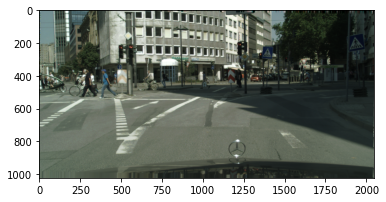

In [ ]:
plt.imshow(img.cpu().permute(1, 2, 0))

In [ ]:
bboxes = prediction[0]['boxes'][prediction[0]['scores']>0.5].cpu().numpy()

In [ ]:
print(prediction[0]['boxes'][prediction[0]['scores']>0.5])

tensor([[ 370.6293,  361.6010,  436.1694,  522.5737],
        [ 746.7020,  374.2407,  786.3197,  477.7295],
        [ 247.0135,  367.6115,  345.4766,  528.2684],
        [ 653.6158,  365.8580,  703.9291,  484.6282],
        [1628.4865,  369.0275, 1658.9993,  443.5366],
        [1197.6390,  352.5220, 1248.5706,  478.3001],
        [ 986.3025,  369.1768, 1028.3976,  473.7702],
        [1596.3986,  367.0015, 1625.4717,  439.4023],
        [ 294.4085,  369.8792,  359.8481,  526.5712],
        [1892.5574,  365.0409, 1922.1887,  432.7193],
        [ 170.1470,  405.0222,  184.8983,  440.0643],
        [  56.2062,  379.7490,   98.6480,  473.1107],
        [ 221.8806,  410.9828,  241.6838,  458.2480],
        [1926.5427,  361.5216, 1957.2854,  435.5951],
        [ 273.5095,  366.5051,  324.5132,  520.7426],
        [ 402.3029,  374.5367,  441.6422,  508.4733],
        [ 182.7888,  392.0287,  199.6815,  431.7182],
        [ 230.3074,  409.3492,  248.1757,  452.8252],
        [ 202.7363,  407.181

In [ ]:
print(bboxes.shape)

(21, 4)


In [ ]:
print(len(bboxes))

21


In [ ]:
print(bboxes[0][1])

361.60104


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


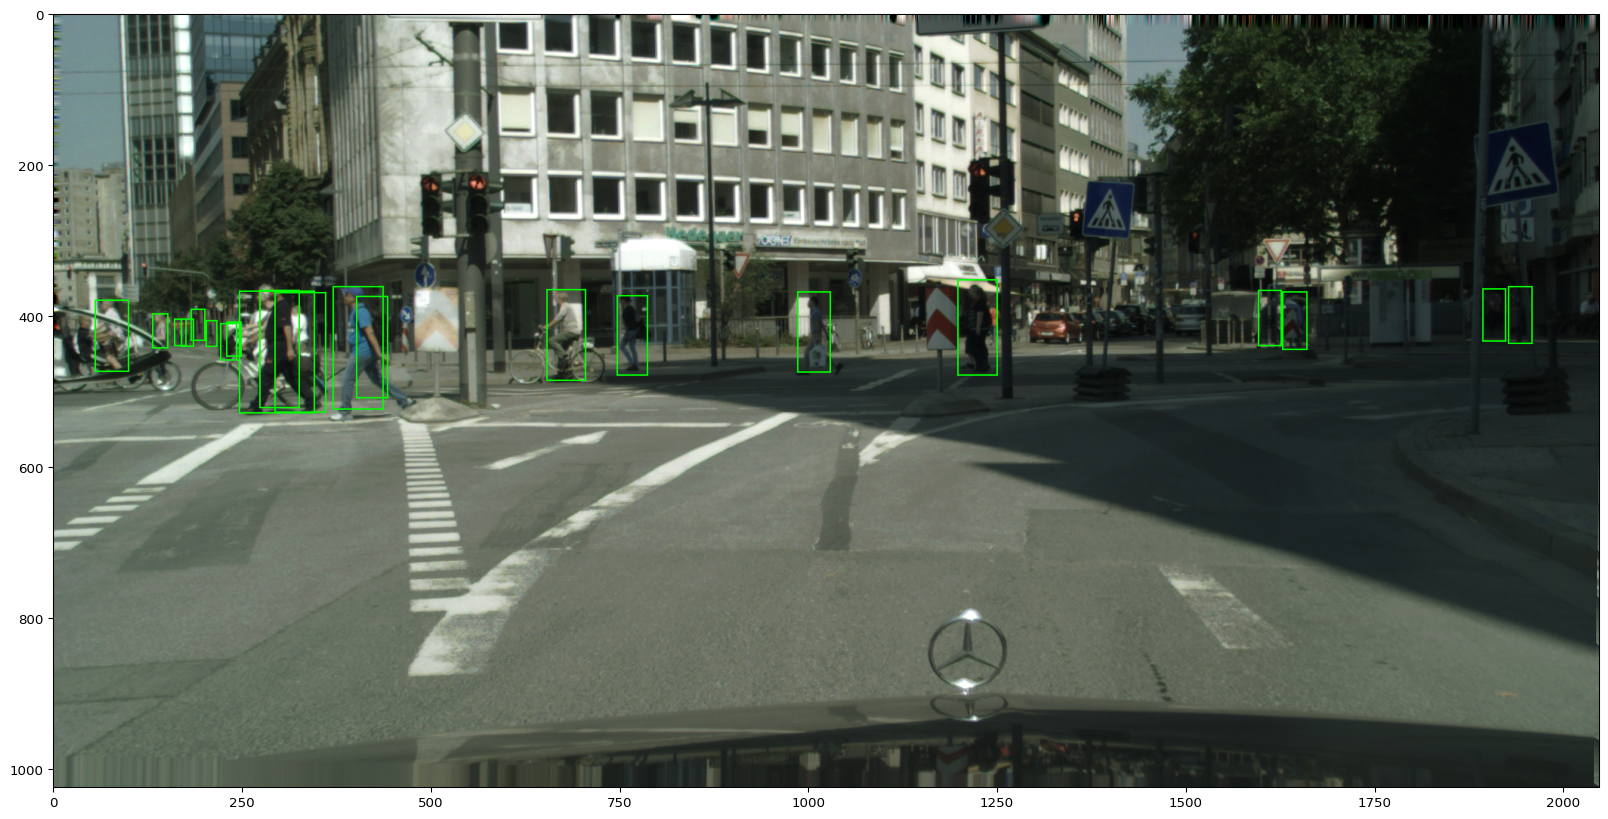

In [ ]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline

ia.seed(1)

#image = imageio.imread(f"{train_path+input_df['file_id'].values[0].split('gtBboxCityPersons')[0]+'leftImg8bit.png'}")
image = img.cpu().permute(1, 2, 0)
#image = ia.imresize_single_image(image, (298, 447))
bboxesimg = []

for j in range(len(bboxes)):
  bboxesimg.append( BoundingBox(x1=bboxes[j][0], x2 = bboxes[j][2], y1=bboxes[j][1], y2=bboxes[j][3]))


bbs = BoundingBoxesOnImage(bboxesimg, shape=image.shape)

ia.imshow(bbs.draw_on_image(image, size=2))
#print(ok)